# Task 4

Find the lowest eigenvalue of the following matrix:

$$M_{t4}=\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}$$

using VQE-like circuits, created by yourself from scratch.

In [1]:
matrix_t4 = [[1,  0,  0, 0],
             [0,  0, -1, 0],
             [0, -1,  0, 0],
             [0,  0,  0, 1]]

## VQE: Variational Quantum Eigensolver

The Variational Quantum Eigensolver [[1](#references)] allows us to find an upper bound of the lowest eigenvalue of a given Hamiltonian [[2](#references)].

In this exercise, the given matrix represents a Hamiltonian (a very simple one) and the lowest eigenvalue that is going to be found corresponds to the lowest energy of the system represented by such Hamiltonian.

<br>
<br>

## Variational principle

Variational principle: the energy of any trial wave-function is greater than or equal to the exact ground state energy.

$$\langle\psi|H|\psi\rangle = E_{\psi} \geq E_0$$

$E_{\psi}$ is an upper bound for the ground state energy, the problem is that just knowing any upper bound doesn’t enough, we could simply try all the possible states and pick the one with the lowest energy, but it's impractical, so we use an **ansatz** [[2](#references)].

<br>
<br>

## Variational form

A systematic approach to varying the **ansatz** is required to implement the variational method on a quantum computer. VQE does so through the use of a parameterized circuit with a fixed form. Such a circuit is often called a variational form, and its action may be represented by the linear transformation $U(\theta)$. A variational form is applied to a starting state $|\psi\rangle$  (such as the vacuum state $|0\rangle$, or the Hartree Fock state) and generates an output state $U(\theta)|\psi\rangle\equiv|\psi(\theta)\rangle$. 

Iterative optimization over $|\psi(\theta)\rangle$ aims to yield an expectation value $\langle\psi(\theta)|H|\psi(\theta)\rangle=E_0\equiv\lambda_{min}$. Ideally, $|\psi(\theta)\rangle$ will be close to $|\psi_{min}\rangle$ (where *'closeness'* is characterized by either state fidelity, or Manhattan distance) although in practice, useful bounds on $E_0$ can be obtained even if this is not the case [[3](#references)].

<br>
<br>

## Pauli matrices

The Pauli matrices [[4](#references)] are a set of $2\times 2$ complex matrices which are *Hermitian* and *unitary*. Are defined as follows:

In [2]:
I = [[ 1+0j,  0+0j],
     [ 0+0j,  1+0j]]

X = [[ 0+0j,  1+0j],
     [ 1+0j,  0+0j]]

Y = [[ 0+0j, -1j+0j],
     [1j+0j,  0+0j]]

Z = [[ 1+0j,  0+0j],
     [ 0+0j, -1+0j]]

print('\nI = ')
print(I)

print('\nX = ')
print(X)

print('\nY = ')
print(Y)

print('\nZ = ')
print(Z)

print('\n')


I = 
[[(1+0j), 0j], [0j, (1+0j)]]

X = 
[[0j, (1+0j)], [(1+0j), 0j]]

Y = 
[[0j, -1j], [1j, 0j]]

Z = 
[[(1+0j), 0j], [0j, (-1+0j)]]




There is a limitation on what Hamiltonians we can use with VQE. We need Hamiltonians constructed as a sum of Pauli operators ($X$, $Y$, $Z$) and their tensor products [[2](#references)].

To find $II, XX, YY, ZZ$, I'm using the Kronecker product [[5](#references)]:

$$II = I\otimes I = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}\otimes\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}$$

**Note**: In mathematics, the Kronecker product, denoted by $\otimes$, is an operation on two matrices of arbitrary size resulting in a block matrix. It is a generalization of the outer product (which is denoted by the same symbol) from vectors to matrices, and gives the matrix of the **tensor product** with respect to a standard choice of basis [[6](#references)].

<br>

In [3]:
import numpy as np

In [4]:
II = np.kron(I,I)
XX = np.kron(X,X)
YY = np.kron(Y,Y)
ZZ = np.kron(Z,Z)

print('\nII = ')
print(II)

print('\nXX = ')
print(XX)

print('\nYY = ')
print(YY)

print('\nZZ = ')
print(ZZ)

print('\n')


II = 
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

XX = 
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

YY = 
[[ 0.+0.j  0.+0.j  0.+0.j -1.-0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]

ZZ = 
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.+0.j  1.-0.j]]




A combination for our Hamiltonian constructed as a sum of Pauli operators that works is:

$$M_{decomp} = \frac{1}{2}ZZ + \frac{1}{2}II - \frac{1}{2}XX - \frac{1}{2}YY = M_{t4}$$

<br>
<br>

In [5]:
m_decomp = (1/2)*ZZ + (1/2)*II - (1/2)*XX - (1/2)*YY

print('Matrix decomposition = ')
print(m_decomp)

Matrix decomposition = 
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [6]:
m_decomp == matrix_t4

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Hamiltonian

The matrix indicated in this exercise is equivalent to the Hamiltonian whose ground state energy (lowest eigenvalue) is to be calculated with Variational Quantum Eigensolver (VQE).

This Hamiltonian is constructed as a sum of Pauli operators ($X$, $Y$, $Z$) and their tensor products, in order to use VQE.

The Hamiltonian, in this case a matrix that is indicated from the start, can be seen as the sum of $H_i$ Hamiltonians:

$$H=H_1+H_2+H_3+H_4$$

where

$$H_1 = \frac{1}{2}ZZ$$

$$H_2 = \frac{1}{2}II$$

$$H_3 = -\frac{1}{2}XX$$

$$H_4 = -\frac{1}{2}YY$$

<br>
<br>

Once the terms are identified, the rotations can be applied as follows [[2](#references)]:

* If it's $X$: $Ry(-\pi/2)$
* If it's $Y$: $Rx(\pi/2)$
* If it's $Z$: Nothing

<br>

## Ansatz

The educated guess (or the quantum state preparation) to be used is (suggested in the tips for this task):

$$(Rx \; I) \; cX \; (H \; I) \; \;|00\rangle$$

The parametrized quantum circuit of the hardware efficient **ansatz** consists of a sequence of single qubit rotation gates and "entangling" 2-qubit gates. One example of the circuits for the ansatz is shown below. Note that each single qubit rotation gate $Rx$ has an angle $\theta$ as a parameter. The number of repetitions of the single qubit rotations and 2-qubit gates (here we choose controlled $X$ gates) are called **depth** [[7](#references)].

The ansatz circuit depth $d$ should increase lineraly with the number of qubits [[8](#references)]. Therefore, different tests will be executed later for different depth values, always considering a linear relationship: $d = \alpha N$.

<br>
<br>

In [7]:
from qiskit import QuantumCircuit

In [8]:
def ansatz_circuit(angle, depth):

    quantumCircuit = QuantumCircuit(2)

    for d in range(depth):
        quantumCircuit.rx(angle, 0)
        quantumCircuit.cx(0, 1)
        quantumCircuit.h(0)

    quantumCircuit.barrier()
    
    return quantumCircuit

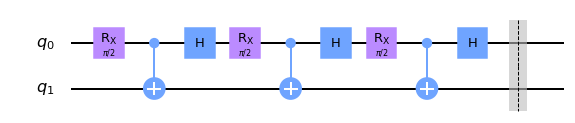

In [9]:
# for test purposes

angle = np.pi/2     # this angle is the variational parameter
d = 3               # this is the depth

ansatz_c = ansatz_circuit(angle, d)

ansatz_c.draw('mpl')

## Measurements


It is necessary to measure in each base (Pauli operators), and as already mentioned above, for each case the following applies (for each qubit) [[2](#references)]:

* If it's $X$: $Ry(-\pi/2)$
* If it's $Y$: $Rx(\pi/2)$
* If it's $Z$: Nothing

<br>

In [10]:
def measure_xx_cir(circuit):
    
    xx = circuit.copy()
    xx.ry(-np.pi/2, 0)
    xx.ry(-np.pi/2, 1)
    xx.measure_all()
    
    return xx

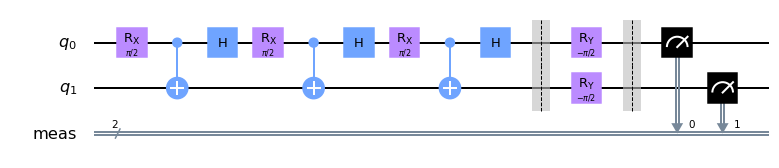

In [11]:
# for test purposes

xx_meas = measure_xx_cir(ansatz_c) # using the previous example of the ansatz circuit
xx_meas.draw('mpl')

In [12]:
def measure_yy_cir(circuit):
    
    yy = circuit.copy()
    yy.rx(np.pi/2, 0)
    yy.rx(np.pi/2, 1)
    yy.measure_all()
    
    return yy

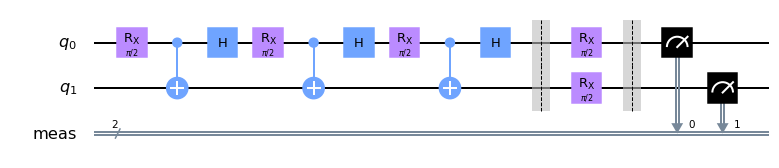

In [13]:
# for test purposes

yy_meas = measure_yy_cir(ansatz_c) # using the previous example of the ansatz circuit
yy_meas.draw('mpl')

In [14]:
def measure_zz_cir(circuit):
    
    zz = circuit.copy()
    zz.measure_all()
    
    return zz

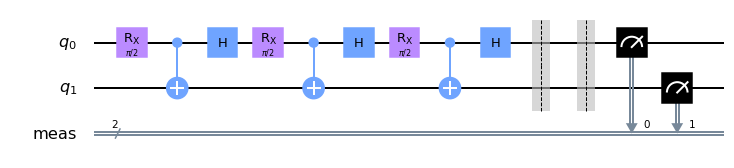

In [15]:
# for test purposes

zz_meas = measure_zz_cir(ansatz_c) # using the previous example of the ansatz circuit
zz_meas.draw('mpl')

In [16]:
from qiskit import Aer, execute
simulator_aer = Aer.get_backend('qasm_simulator') # choosing a backend to run the circuit

In [17]:
def measure(ansatz, measure_cir, simulator, num_shots = 10000):

    meas = measure_cir(ansatz)
    
    result = execute(meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(meas)

    # determine the counts by results combinations of the two qubits
    if '00' not in counts: counts['00'] = 0
    if '01' not in counts: counts['01'] = 0
    if '10' not in counts: counts['10'] = 0
    if '11' not in counts: counts['11'] = 0 

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    
    counts_to_consider = counts['00'] + counts['11'] - counts['01'] - counts['10']
    
    
    return counts_to_consider / total_counts
    

In [18]:
# for test purposes

xx = measure(ansatz_c, measure_xx_cir, simulator_aer) # using the previous example of the ansatz circuit
print("<XX> =", str(xx))

<XX> = 0.0114


In [19]:
# for test purposes

yy = measure(ansatz_c, measure_yy_cir, simulator_aer) # using the previous example of the ansatz circuit
print("<YY> =", str(yy))

<YY> = -0.0012


In [20]:
# for test purposes

zz = measure(ansatz_c, measure_zz_cir, simulator_aer) # using the previous example of the ansatz circuit
print("<ZZ> =", str(zz))

<ZZ> = 0.0158


## Calculate energy

Evaluate the energy (eigenvalue) of the trial state.

<br>

In [21]:
def calculate_energy(angle, simulator, depth, num_shots = 10000):

    ansatz_cir = ansatz_circuit(angle, depth)
    
    xx = measure(ansatz_cir, measure_xx_cir, simulator, num_shots = num_shots)
    yy = measure(ansatz_cir, measure_yy_cir, simulator, num_shots = num_shots)
    zz = measure(ansatz_cir, measure_zz_cir, simulator, num_shots = num_shots)

    
    energy = (0.5)*zz + (0.5)*1 + (-0.5)*xx + (-0.5)*yy  # this is the Hamiltonian of the system we are working with 
                                                         # (matrix indicated in the exercise in terms of Pauli operators)
    
    return energy


## Find the optimized variational parameter

The variational parameter must be optimized to be able to find the ground state of the system (the lowest eigenvalue of the matrix), so I try with several values in the range for the angle to be able to find with which one I will obtain the minimum value of the energy, for this, plots are generated in order to visualize where the minimum values are found.

This is performed for a variety of depth values since the only thing is known so far is that the depth must be linearly dependent of the number of qubits.

Once results are obtained, a search for the values of the angle optimized is performed and show the result for each case.

<br>
<br>

In [22]:
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import math
import sys

In [23]:
def multiple_depths(simulator, tot_depths, num_shots):
    
    angles_min_energy_per_depth = []
    all_data = []
    
    cols = 3
    rows = math.ceil(tot_depths/cols)
    f, axs = plt.subplots(rows, cols, figsize=(12, 3 * rows))
    precision = np.pi/300
    
    xs = np.arange(0, 2*np.pi, precision)
    
    row = 0
    col = 0
    
    for depth in range(1, tot_depths + 1):           # run for several angles for each depth
        
        ys = []
        for angle in xs:
            ener = calculate_energy(angle, simulator, depth, num_shots = num_shots)
            ys.append(ener)
            #print('Angle:', angle, ', \tEnergy:', str(ener))
            
        min_y = min(ys)
        indexes = [i for i, v in enumerate(ys) if v > min_y - precision and v < min_y + precision]
        angles_list = [xs[i] for i in indexes]
        angles_min_energy_per_depth.append((angles_list, min_y))
        
        all_data.append((xs, ys))
        
        add_subplot(axs[row, col], xs, ys, depth)   # add the corresponding plot for this depth value
        
        col = 0 if col == cols-1 else col+1
        row += 1 if col == 0 else 0
        
        
        
    for ax in axs.flat:
        ax.set_xlabel('angle', fontsize = 15)
        ax.set_ylabel('energy', fontsize = 15)

    for ax in axs.flat:
        ax.label_outer()
        
    
    plt.show()
    
    return angles_min_energy_per_depth, all_data


In [24]:
def add_subplot(ax, xs, ys, depth):

    ax.plot(xs/np.pi, ys)
    
    ax.set_title('Ansatz depth = ' + str(depth), fontsize = 13)
    
    ax.set_ylim([-1.5, 1.5])
    
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax.xaxis.set_major_locator(tck.MultipleLocator(base = 0.5))

    ax.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)


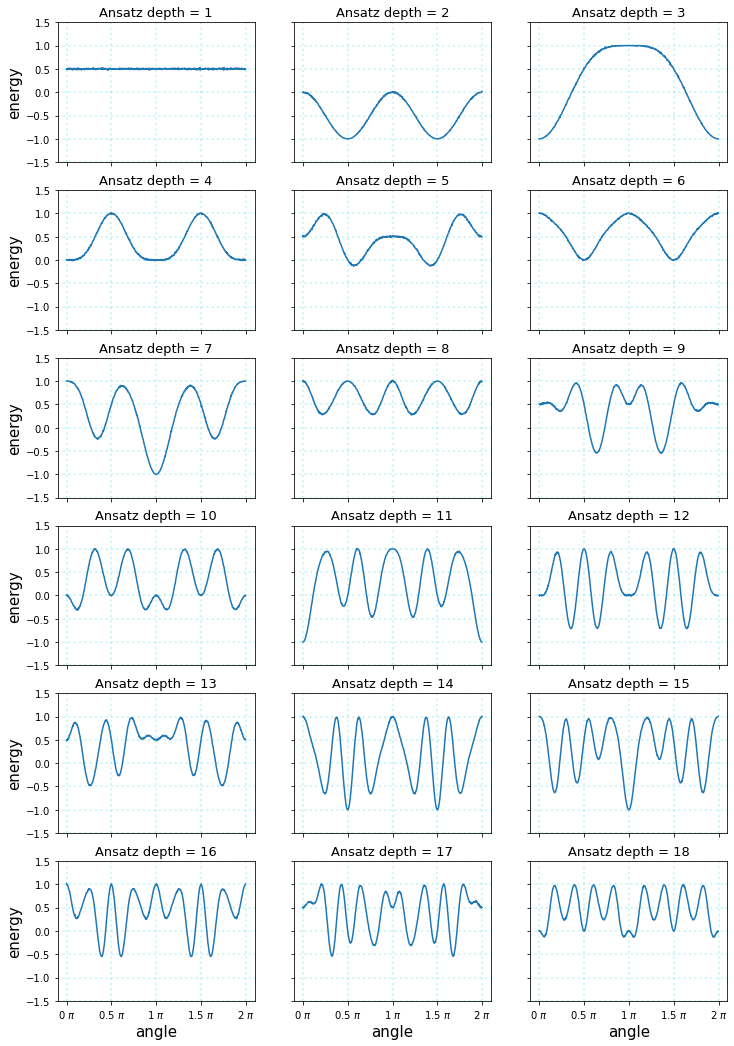

In [25]:
min_angles, all_data = multiple_depths(simulator_aer, 18, 10000)     # (simulator, tot_depths, num_shots)

In [26]:
print('Depth\t\tMin Energy\t\tAngles')
count = 1
for depth in min_angles:
    str_to_print = '{}\t\t{: >8.3f}\t\t'.format(count, depth[1])
    count += 1
    multipliers = []
    for angle in depth[0]:
        multiplier = round(angle / np.pi, 1)
        if multiplier not in multipliers:
            multipliers.append(multiplier)
    for multiplier in multipliers:
        str_to_print += ('' if multiplier == 1 else '{}'.format(multiplier)) + 'pi, '
    print(str_to_print)
        

Depth		Min Energy		Angles
1		   0.474		0.1pi, 0.2pi, 0.3pi, 0.5pi, 0.8pi, 0.9pi, 1.4pi, 1.5pi, 1.6pi, 1.7pi, 1.8pi, 2.0pi, 
2		  -1.000		0.5pi, 1.5pi, 
3		  -1.000		0.0pi, 2.0pi, 
4		  -0.022		0.1pi, pi, 1.1pi, 2.0pi, 
5		  -0.135		0.6pi, 1.4pi, 
6		  -0.014		0.5pi, 1.5pi, 
7		  -1.000		pi, 
8		   0.274		0.2pi, 0.8pi, 1.2pi, 
9		  -0.548		0.6pi, 1.4pi, 
10		  -0.312		0.1pi, 0.9pi, 1.1pi, 1.9pi, 
11		  -1.000		0.0pi, 2.0pi, 
12		  -0.714		0.4pi, 0.6pi, 1.3pi, 1.4pi, 1.6pi, 
13		  -0.482		0.3pi, 1.7pi, 1.8pi, 
14		  -1.000		0.5pi, 1.5pi, 
15		  -1.000		pi, 
16		  -0.550		0.4pi, 0.6pi, 1.4pi, 1.6pi, 
17		  -0.541		0.3pi, 1.7pi, 
18		  -0.134		0.1pi, 0.9pi, pi, 1.1pi, 1.9pi, 2.0pi, 


<br>
One option that works is when $d = 3$, in which a minimum energy value of $-1$ is obtained, for angles $0$ and $2\pi$.

<br>
<br>

In [27]:
angle_var_par = 2 * np.pi
depth = 3
print('Angle:', angle_var_par, ', \tEnergy:', str(calculate_energy(angle_var_par, simulator_aer, depth, num_shots = 10000)))

Angle: 6.283185307179586 , 	Energy: -1.0


# Result: -1.0

The **lowest eigenvalue** for the matrix specified in this task is equal to **$-1.0$**.

<br>
<br>

## Calculate the eigenvalues by another method

Since the matrix is very simple, it is possible to use the library ``numpy`` to find the eigenvalues and confirm that the lowest eigenvalue is equal to -1.

<br>
<br>

In [28]:
values = np.linalg.eigvalsh(matrix_t4)

print('Eigenvalues \t \t = ', values)

print('Lowest eigenvalue \t = ', min(values))                        # from original matrix

Eigenvalues 	 	 =  [-1.  1.  1.  1.]
Lowest eigenvalue 	 =  -1.0


In [29]:
print('Lowest eigenvalue \t = ', min(np.linalg.eigvalsh(m_decomp)))  # from matrix decomposition

Lowest eigenvalue 	 =  -1.0


<a id='references'></a>

## References

* [1] Alberto Peruzzo, Jarrod McClean et al., "A variational eigenvalue solver on a photonic quantum processor". [Nature Communications 5, 4213 (2014)](https://www.nature.com/articles/ncomms5213).
* [2] VQE explained, Musty Thoughts by Michał Stęchły, [https://www.mustythoughts.com/variational-quantum-eigensolver-explained](https://www.mustythoughts.com/variational-quantum-eigensolver-explained)
* [3] Simulating Molecules using VQE, Learn Quantum Computation using Qiskit (Qiskit Textbook), [https://qiskit.org/textbook/ch-applications/vqe-molecules.html](https://qiskit.org/textbook/ch-applications/vqe-molecules.html)
* [4] Pauli matrices, Wikipedia, [https://en.wikipedia.org/wiki/Pauli_matrices](https://en.wikipedia.org/wiki/Pauli_matrices)
* [5] Kronecker product, Wikipedia, [https://en.wikipedia.org/wiki/Kronecker_product](https://en.wikipedia.org/wiki/Kronecker_product)
* [6] NumPy: Compute the Kronecker product of two given mulitdimension arrays, w3resource, [https://www.w3resource.com/python-exercises/numpy/linear-algebra/numpy-linear-algebra-exercise-8.php](https://www.w3resource.com/python-exercises/numpy/linear-algebra/numpy-linear-algebra-exercise-8.php)
* [7] Algorithms, Ansatz, Quantaggle, [https://quantaggle.com/algorithms/ansatz/](https://quantaggle.com/algorithms/ansatz/)
* [8] Jin-Guo Liu, Yi-Hong Zhang, Yuan Wan, and Lei Wang, "Variational quantum eigensolver with fewer qubits". [Physical Review Research 1, 023025 (2019)](https://journals.aps.org/prresearch/pdf/10.1103/PhysRevResearch.1.023025)